# Project Title
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [1]:
# Do all imports and installs here
import pandas as pd
import numpy as np
from glob import glob

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.\
config("spark.jars.repositories", "https://repos.spark-packages.org/").\
config("spark.jars.packages", "saurfang:spark-sas7bdat:2.0.0-s_2.11").\
enableHiveSupport().getOrCreate()

## Step 1: Scope the Project and Gather Data

### Scope 
<i>Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc></i>

In this project I plan to use the udacity provided datasets to build a data warehouse of cleaned and processed data that can be used by a hypothetical analytics team.

The <b>data</b> I will use comes from the udacity provided datasets. This includes: 
- I94 Immigration Data: This data is from the US National Tourisim and Trade Office. A data dictionary is provided in the workspace (I94_SAS_Labels_Descriptions.SAS)
- Airport codes: This includes airport codes of corresponding cities.
- Temperature Data: A Kaggle provided dataset: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/
- Demographic Data: An OpenSoft provided dataset: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/

My <b>End Solution</b> will be a clean database that is cleans and processed the datasets mentioned above into a format that is useful for an analytics team. I plan to build a star schema database.  

The <b>tools</b> I plan to use are:
- Amazon redshift database: for storing the cleaned tables
- s3: for storing the raw and staging tables


### Describe and Gather Data 
<i>Describe the data sets you're using. Where did it come from? What type of information is included? </i>

The <b>data</b> I am using for this project are the udacity provided  


#### I94 Immigration Data: 
##### where does it come from?
This data is from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office
##### What type of information is included?
In this dataset are statistics on visitor arrival information from 2016.  A data dictionary is provided in the workspace (I94_SAS_Labels_Descriptions.SAS) that goes into detail on the variables provided.

#### Airport codes: 

##### where does it come from? 
This data comes from here: https://datahub.io/core/airport-codes#data

##### What type of information is included?
This includes airport codes of corresponding cities. 



#### Temperature Data: 
##### where does it come from?
A Kaggle provided dataset: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/
##### What type of information is included?
This dataset includes daily average temperatures by city going as far back as 1744. Data from 2016 will likely only be relevant.



#### Demographic Data: 
##### where does it come from?
An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/
##### What type of information is included?
This dataset contains information about the demographics of all US cities and census-designated places with a population greater or equal to 65,000.

### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.


##### immigration data

In [3]:
# immigration data
fname = '../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat'
df_immig = spark.read.format("com.github.saurfang.sas.spark").load(fname)

In [4]:
df_immig.limit(10).toPandas().columns

Index(['cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port', 'arrdate',
       'i94mode', 'i94addr', 'depdate', 'i94bir', 'i94visa', 'count',
       'dtadfile', 'visapost', 'occup', 'entdepa', 'entdepd', 'entdepu',
       'matflag', 'biryear', 'dtaddto', 'gender', 'insnum', 'airline',
       'admnum', 'fltno', 'visatype'],
      dtype='object')

In [5]:
df_immig.limit(10).toPandas()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,6.0,2016.0,4.0,692.0,692.0,XXX,20573.0,NaN,None,NaN,...,U,None,1979.0,10282016,None,None,None,1.897628e+09,None,B2
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,...,Y,None,1991.0,D/S,M,None,None,3.736796e+09,00296,F1
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,None,M,1961.0,09302016,M,None,OS,6.666432e+08,93,B2
3,16.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,None,M,1988.0,09302016,None,None,AA,9.246846e+10,00199,B2
4,17.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,None,M,2012.0,09302016,None,None,AA,9.246846e+10,00199,B2
5,18.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MI,20555.0,...,None,M,1959.0,09302016,None,None,AZ,9.247104e+10,00602,B1
6,19.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NJ,20558.0,...,None,M,1953.0,09302016,None,None,AZ,9.247140e+10,00602,B2
7,20.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NJ,20558.0,...,None,M,1959.0,09302016,None,None,AZ,9.247161e+10,00602,B2
8,21.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NY,20553.0,...,None,M,1970.0,09302016,None,None,AZ,9.247080e+10,00602,B2
9,22.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,NY,20562.0,...,None,M,1968.0,09302016,None,None,AZ,9.247849e+10,00608,B1


The immigration data does not appear to have any duplicated rows. No cleaning for duplicates will be necessary.

In [6]:
print('Number of rows: {}'.format(df_immig.count()))
print('Number of rows without duplicates: {}'.format(df_immig.drop_duplicates().count()))
print('Number of duplicates: {}'.format(df_immig.count()-df_immig.drop_duplicates().count()))

Number of rows: 3096313
Number of rows without duplicates: 3096313
Number of duplicates: 0


There does appear to be some missing values, especially visapost, occup, entdepu, isnum. Important identifying columns like port, arrdate are without missing values. 

In [7]:
# attributed to https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe
from pyspark.sql.functions import isnan, when, count, col
df_immig.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_immig.columns]).show()

+-----+-----+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+------+-----+--------+
|cicid|i94yr|i94mon|i94cit|i94res|i94port|arrdate|i94mode|i94addr|depdate|i94bir|i94visa|count|dtadfile|visapost|  occup|entdepa|entdepd|entdepu|matflag|biryear|dtaddto|gender| insnum|airline|admnum|fltno|visatype|
+-----+-----+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+------+-----+--------+
|    0|    0|     0|     0|     0|      0|      0|    239| 152592| 142457|   802|      0|    0|       1| 1881250|3088187|    238| 138429|3095921| 138429|    802|    477|414269|2982605|  83627|     0|19549|       0|
+-----+-----+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-------+-------+-------+---

##### Airport data

In [4]:
# airport data
df_airport = pd.read_csv('airport-codes_csv.csv')
df_airport.head(10)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"
5,00AS,small_airport,Fulton Airport,1100.0,NaN,US,US-OK,Alex,00AS,NaN,00AS,"-97.8180194, 34.9428028"
6,00AZ,small_airport,Cordes Airport,3810.0,NaN,US,US-AZ,Cordes,00AZ,NaN,00AZ,"-112.16500091552734, 34.305599212646484"
7,00CA,small_airport,Goldstone /Gts/ Airport,3038.0,NaN,US,US-CA,Barstow,00CA,NaN,00CA,"-116.888000488, 35.350498199499995"
8,00CL,small_airport,Williams Ag Airport,87.0,NaN,US,US-CA,Biggs,00CL,NaN,00CL,"-121.763427, 39.427188"
9,00CN,heliport,Kitchen Creek Helibase Heliport,3350.0,NaN,US,US-CA,Pine Valley,00CN,NaN,00CN,"-116.4597417, 32.7273736"


The airport data has lots of missing values for elevation_ft, continent, iso_country, iso_region, municipality, gps_code, iata_code and local_code. However, ident, type, name and coordinates has 0 missing values and these are the most important columns in my opinion. I will remove all, but these 4 columns for this project.

In [9]:
df_airport.isna().sum()

ident               0
type                0
name                0
elevation_ft     7006
continent       27719
iso_country       247
iso_region          0
municipality     5676
gps_code        14045
iata_code       45886
local_code      26389
coordinates         0
dtype: int64

There are 0 duplicate values in the airport dataset

In [10]:
print('Number of rows: {}'.format(len(df_airport)))
print('Number of rows without duplicates: {}'.format(len(df_airport.drop_duplicates())))
print('Number of duplicates: {}'.format(len(df_airport)-len(df_airport.drop_duplicates())))

Number of rows: 55075
Number of rows without duplicates: 55075
Number of duplicates: 0


##### Temperature Data

In [5]:
# Temperature Data
fname = '../../data2/GlobalLandTemperaturesByCity.csv'
df_temp = pd.read_csv(fname)

In [12]:
df_temp.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


Looking at the full dataset there is a large number of missing values for AverageTemperature and AverageTemperatureUncertainty.

In [13]:
df_temp.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

I will likely only need data from 2016 only to match what I have available from the immigration dataset. Looking here it seems like there is no missing value issue for 2016.

In [14]:
df_temp[(df_temp.dt>='2016-01-01') & (df_temp.dt<'2017-01-01')].isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

There does not appear to be an issue with duplicate values

In [15]:
print('Number of rows: {}'.format(len(df_temp)))
print('Number of rows without duplicates: {}'.format(len(df_temp.drop_duplicates())))
print('Number of duplicates: {}'.format(len(df_temp)-len(df_temp.drop_duplicates())))

Number of rows: 8599212
Number of rows without duplicates: 8599212
Number of duplicates: 0


##### Demographic Data

In [6]:
# Demographic Data
df_demo = pd.read_csv('us-cities-demographics.csv', sep = ';')
df_demo.head(10)

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402
5,Peoria,Illinois,33.1,56229.0,62432.0,118661,6634.0,7517.0,2.40,IL,American Indian and Alaska Native,1343
6,Avondale,Arizona,29.1,38712.0,41971.0,80683,4815.0,8355.0,3.18,AZ,Black or African-American,11592
7,West Covina,California,39.8,51629.0,56860.0,108489,3800.0,37038.0,3.56,CA,Asian,32716
8,O'Fallon,Missouri,36.0,41762.0,43270.0,85032,5783.0,3269.0,2.77,MO,Hispanic or Latino,2583
9,High Point,North Carolina,35.5,51751.0,58077.0,109828,5204.0,16315.0,2.65,NC,Asian,11060


Missing data does not appear to be huge consideration for this dataset

In [17]:
df_demo.isna().sum()

City                       0
State                      0
Median Age                 0
Male Population            3
Female Population          3
Total Population           0
Number of Veterans        13
Foreign-born              13
Average Household Size    16
State Code                 0
Race                       0
Count                      0
dtype: int64

There does not appear to be any duplicate rows

In [18]:
print('Number of rows: {}'.format(len(df_demo)))
print('Number of rows without duplicates: {}'.format(len(df_demo.drop_duplicates())))
print('Number of duplicates: {}'.format(len(df_demo)-len(df_demo.drop_duplicates())))

Number of rows: 2891
Number of rows without duplicates: 2891
Number of duplicates: 0


#### Cleaning Steps
Document steps necessary to clean the data

##### Immigration Data
- filter columns
- rename columns

##### Airport Data
- Select US only
- Choose only small, medium or large airports
- Split coordinates to longitude and latitude
- Drop local_code values that are null
- Extract state_code from iso_region
- Select relevant columns

##### Temperature Data
- Filter out non-US data
- Extract year from dt
- Extract month from dt
- Rename relevant columns
- Aggregate data by city and month and year

##### Demographic Data 
- Change all columns to lower case
- Set integer columns to integer
- replace whitespace and '-' with '_' in the columns to follow convention

In [7]:
# Performing cleaning tasks here

##### Immigration data #####

# Reduce variables to the variables of interest
def clean_immig_data(df_immig):
    """
    cleans the immigration spark dataset and returns a reduced and relabeled dataset.
    parameters:
    df_immg: spark dataset of the immigration dataset
    """
    immig_fact = df_immig[['cicid', 'i94yr', 'i94mon', 'i94port', 'i94addr', 'arrdate', 
                                       'i94bir','i94visa', 'i94mode', 'airline']]
    # Rename columns 
    immig_fact = immig_fact.toDF(*['cicid','year', 'month', 'port', 'addr', 'arrival_date',
                                      'resp_age', 'visa','mode', 'airline']) 
    return(immig_fact)

# Do not need drop duplicate values and I will not be controlling for missing values in any way

##### Airport data #####
def clean_airport_data(df_airport):
    """
    cleans the airport dataset and returns a cleaned pandas dataset.
    parameters:
    df_airport: the pandas dataframe of the airport datasert
    """
    # remove non-US airports
    airport_dim = df_airport[df_airport.iso_country == 'US']
    # remove irrelevant airports
    airport_dim = airport_dim[[i in ['small_airport', 'medium_airport', 'large_airport'] for i in airport_dim.type]] 
    # Remove the null cases for local_code
    airport_dim = airport_dim[airport_dim.local_code.isna()==False] 
    # split coordinates to longitude and latitude
    airport_dim['longitude']=[float(i.split(',')[0]) for i in airport_dim['coordinates']]
    airport_dim['latitude']=[float(i.split(',')[1]) for i in airport_dim['coordinates']]
    # extract state_code from iso_region
    airport_dim['state_code'] = [i.split('-')[1] for i in airport_dim['iso_region']]

    # include only the relevant columns I want to include
    airport_dim = airport_dim[['type', 'name', 'elevation_ft', 'state_code',
                             'iso_country', 'municipality', 'local_code', 'longitude', 'latitude']] 
    # rename local_code to port to match fact table
    airport_dim.rename(columns={'local_code':'port',
                               'municipality':'city'}, inplace=True)
    return(airport_dim)


##### Tempurature data #####
def clean_temp_data(df_temp):
    """
    cleaned the temperature dataset and returns a reduced and cleaned dataset.
    parameters:
    df_temp: pandas dataframe of the temperature data
    """
    # Filter out non-US data
    temp_dim = df_temp[df_temp.Country == 'United States'] 
    # Extract year 
    temp_dim['year'] = [int(i[:4]) for i in temp_dim.dt] 
    # Extract month
    temp_dim['month'] = [int(i[5:7]) for i in temp_dim.dt]
    # Rename relevant columns
    temp_dim.rename(columns = {'AverageTemperature':'avg_temp',
                             'AverageTemperatureUncertainty':'avg_temp_uncertainty',
                             'City':'city'}, inplace = True) 
    # Aggregate data by city and month and year
    temp_dim = temp_dim[temp_dim.year >=2010].groupby(['city','month']).mean().reset_index()[['city','month','avg_temp','avg_temp_uncertainty']]
    return(temp_dim)

##### Demographic Data #####
def clean_demo_data(df_demo):
    """
    cleaning the demo data and exporting a clean pandas dataset.
    parameters:
    df_demo: pandas dataframe of the demographic data
    """
    demo_dim = df_demo.copy()
    # Change all columns to lower case
    demo_dim.columns = [i.lower() for i in demo_dim.columns]
    # set integer columns to integer
    demo_dim['male population']=  [int(i) for i in np.nan_to_num(demo_dim['male population'])]
    demo_dim['female population']=  [int(i) for i in np.nan_to_num(demo_dim['female population'])]
    demo_dim['total population']= [int(i) for i in np.nan_to_num(demo_dim['total population'])]
    demo_dim['number of veterans']= [int(i) for i in np.nan_to_num(demo_dim['number of veterans'])]
    demo_dim['foreign-born']=  [int(i) for i in np.nan_to_num(demo_dim['foreign-born'])]
    # replace whitespace and '-' with '_'
    demo_dim.columns = [i.replace(' ', '_').replace('-','_') for i in demo_dim.columns]
    # drop irrelevant columns
    demo_dim.drop(columns = 'count', inplace=True)
    return(demo_dim)

##### City ID Table #####
def clean_city_data(aiport_dim, demo_dim, temp_dim):
    """
    ingests the airport, demo, and temp cleaned datasets and extracts the city information and records the unique citys across the three datasets
    parameters:
    airport_dim: cleaned pandas dataframe of airport data 
    demo_dim: cleaned pandas dataframe of demo data 
    temp_dim cleaned pandas dataframe of temp data 
    """
    # make a city table
    a_list = list(airport_dim.city.unique())
    d_list = list(demo_dim.city.unique())
    t_list = list(temp_dim.city.unique())
    city_list = (set.union(set(t_list), set(d_list), set(a_list)))
    city_dim =pd.DataFrame({'city_name':list(city_list)})
    return(city_dim)

#### Port ID Table #####
def clean_port_data(immig_fact, airport_dim):
    """
    ingests the immigration and airport cleaned datasets and extracts the port information and records the unique ports across the two datasets
    parameters:
    immig_fact: cleaned pyspark dataframe of immigration data
    airport_dim: cleaned pandas dataframe of airport data 
    """
    imm_dist_port =immig_fact.select('port').distinct().collect()
    airport_port = airport_dim[['port']]
    portlist = list(set.union(set([i.port for i in imm_dist_port]), set(airport_port)))
    port_dim = pd.DataFrame({'port_name':portlist})
    return(port_dim)

immig_fact = clean_immig_data(df_immig)
airport_dim = clean_airport_data(df_airport)
temp_dim = clean_temp_data(df_temp)
demo_dim = clean_demo_data(df_demo)
city_dim = clean_city_data(airport_dim, demo_dim, temp_dim)
port_dim = clean_port_data(immig_fact, airport_dim)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)

In [ ]:
immig_fact.write.parquet('immig_fact')
temp_dim.to_csv('temp_dim.csv', header=False, index = False, sep=';')
demo_dim.to_csv('demo_dim.csv', header=False, index=False, sep=';')
city_dim.to_csv('city_dim.csv', header=False, index=False, sep=';')
port_dim.to_csv('port_dim.csv', header=False, index=False, sep=';')
airport_dim.to_csv('airport_dim.csv', header=False, index=False, sep=';')

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

Below I map out how my staging tables will appear and then how my final analysis tables appear. 

The biggest change I make from going between staging and analysis table is to:
a) make unique int identifiers for city and port
b) replace city with city_id and port with port_id in temp, demo, airport and immig tables
c) add in city_id to the immig_fact table

The most import change I believe i make is to add in the city_id into the immig_fact table. The reasoning for this is to speed up joins between temp, demo, airport with immig fact by using a common id across all tables. I wanted the user to not have to match port to city to perform all the queries on the database. This should make the end users experience more streamlined and simplifies the data model around a simple star schema.

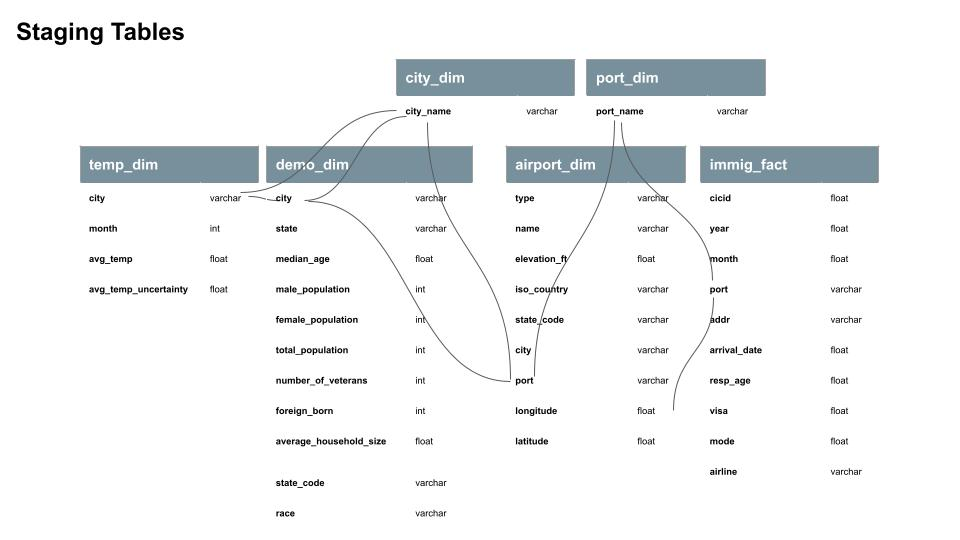

In [4]:
from IPython.display import Image
Image(filename='database design staging.jpg') 

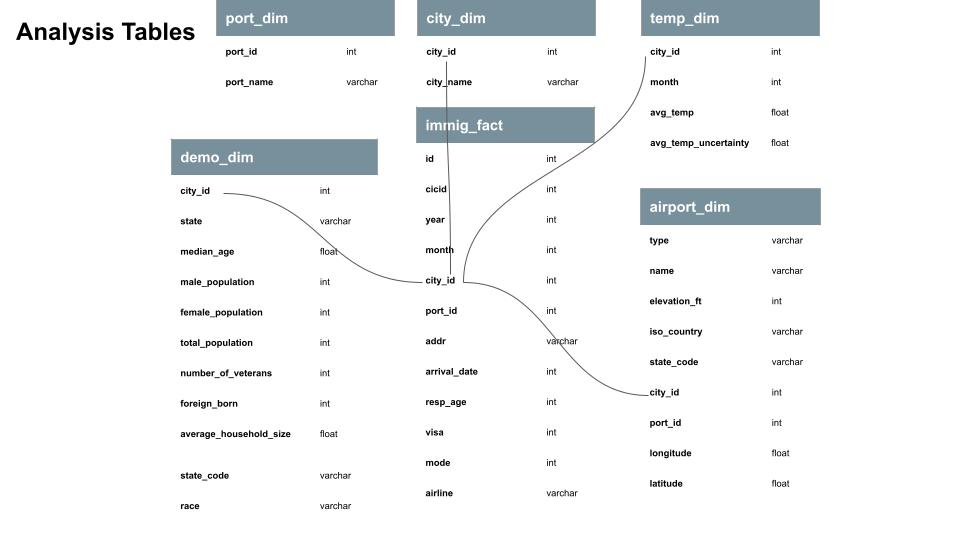

In [3]:
from IPython.display import Image
Image(filename='database design analysis.jpg') 

#### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model



### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

I built the data pipeline in create_tables.py, etl.py and sql_queries.py

After the dwh.cfg file is populated with proper credential information the following two commands runs the etl process:

In [1]:
# Write code here

!python3 create_tables.py

In [2]:
!python3 etl.py

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [27]:
port_count_source =immig_fact.select('port').groupby('port').count().toPandas()

In [4]:
# Perform quality checks here
import psycopg2
import configparser
import pandas as pd
config = configparser.ConfigParser()
config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()
query = 'select port_name, count(immig_fact.port_id) from immig_fact join port_dim on port_dim.port_id = immig_fact.port_id group by port_name'
port_count_db = pd.read_sql_query(query, conn)

Checking for count consistency between source data and database. Achieved matching counts.

In [31]:
port_count_source[port_count_source.port =='LOS']

,port,count
252,LOS,310163


In [7]:
port_count_db[port_count_db.port_name == 'LOS']

,port_name,count
8,LOS,310163


In [3]:
import psycopg2
import configparser
import pandas as pd
config = configparser.ConfigParser()
config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()
query = 'select * from airport_dim limit 5'
airport_output = pd.read_sql_query(query, conn)

In [4]:
airport_output 

,type,name,elevation_ft,state_code,iso_country,city_id,port_id,longitude,latitude
0,small_airport,Appalachian Regional Airport,1883,US,WV,12,None,-82.122100,37.681800
1,small_airport,Poverty Hollow Airport,330,US,OR,28,None,-123.390999,45.157101
2,small_airport,Minikey Airport,900,US,MI,28,None,-85.061699,43.161701
3,small_airport,Sheridan Airport,936,US,IN,28,None,-86.217300,40.177898
4,small_airport,Mach-O Acres Airport,435,US,OR,28,None,-123.370003,45.199001


#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

#### demo_dim
- city_id
 - type: int
 - source: city_dim table
 - description: unique identifier for city
- state
 - type: varchar
 - source: State column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv' 
 - description: The two letter indicator for state
- median_age
 - type: float
 - source: Median Age column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: The median age of city
- male_population
 - type: int
 - source: Male Population column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: The number of men in the city
- female_population
 - type: int
 - source: Female Population column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: The number of females in the city
- total_population
 - type: int
 - source: Total Population column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: The total population of the city 
- number_of_veterans
 - type: int
 - source: Number of Veterans column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: The total number of veterans in the city
- foreign_born
 - type: int
 - source: Foreign-born column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: number of foreign born living in the city
- average_household_size
 - type: float
 - source: Average Household Size column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: The average household size in the city
- state_code
 - type: varchar
 - source: State Code column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: The two letter indicator of the state i.e. CA
- race
 - type: varchar
 - source: race column matched from An OpenSoft provided dataset. This data comes from here: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/. File name is 'us-cities-demographics.csv
 - description: The race of the respondents from that city

#### immig_fact
- id
 - type: int
 - source: generated primary key
 - description: row indicator of the records
- cicid
 - type: int
 - source: cicid column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office. 
 - description: a unique identifier code from the source document
- year
 - type: int
 - source: i94yr column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office.
 - description: year in 4 digit format YYYY
- month
 - type: int
 - source: i94mon column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office.
 - description: month numeric value i.e. 1-12, where 12 is december
- city_id
 - type: int
 - source: city_dim table id
 - description: unique city id
- port_id
 - type: int
 - source: port_dim table id
 - description: unique port id
- addr
 - type: varchar
 - source: i94addr column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office.
 - description: US state of arrival
- arrival_date
 - type: int
 - source: arrdate column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office.
 - description: arrival date into the US
- resp_age
 - type: int
 - source: i94bir column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office.
 - description: the age of the respondent in years
- visa
 - type: int
 - source: i94visa column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office.
 - description: the visa code
- mode
 - type: int
 - source: i94mode column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office.
 - description: How respondent entered the us. options: 1 for air, 2 for sea, 3 for land, and 9 is not reported in the data
- airline
 - type: varchar
 - source: airline column from the US National Tourisim and Trade Office. This dataset is from here: https://www.trade.gov/national-travel-and-tourism-office.
 - description: The name of the airline respondent arrived on

#### airport_dim
- type
 - type: varchar
 - source: Type column in the airport dataset. This data comes from here: https://datahub.io/core/airport-codes#data
 - description: Indicating what type of airport it is e.g. small, medium, or large airport
- name
 - type: varchar
 - source: name column in the airport dataset. This data comes from here: https://datahub.io/core/airport-codes#data
 - description: The full name of the airport
- elevation_ft
 - type: int
 - source: elevation_ft from the airport dataset. This data comes from here: https://datahub.io/core/airport-codes#data
 - description: The airports elevation from sea level in feet
- state_code
 - type: varchar
 - source: iso_region has state and country short forms. We extracted the state code from this column. This data comes from here: https://datahub.io/core/airport-codes#data
 - description: Two letter indicator of the state, e.g. CA 
- iso_country
 - type: varchar
 - source: iso_country column in the airport dataset . This data comes from here: https://datahub.io/core/airport-codes#data
 - description: This is the short form of the country of the airport i.e. US. Only US airports are included.
- city_id
 - type: int
 - source: This comes from the city_dim table
 - description: unique id linked to the name of the city stored in the city_dim table
- port_id
 - type: int
 - source: This comes from the port_dim table
 - description: unique id linked to the name of the port stored in the port_dim table
- longitude
 - type: float
 - source: split from the coordinates column in the airport data. This data comes from here: https://datahub.io/core/airport-codes#data
 - description: The longitude coordinate of the airport 
- latitude
 - type: float
 - source: split from the coordinates column in the airport data. This data comes from here: https://datahub.io/core/airport-codes#data
 - description: The latitude coordinate of the airport 
 
#### temp_dim
- city_id
 - type: int
 - source: data from the city_dim
 - description: unique id from the city_dim table
- month
 - type: int
 - source: month column from the provided GlobalLandTemperaturesByCity.csv
 - description: The month number of the year e.g. january is 1 and december is 12
- avg_temp
 - type: float
 - source: AverageTemperature column from the provided GlobalLandTemperaturesByCity.csv
 - description: The average temperature for that month
- avg_temp_uncertainty
 - type: float
 - source: AverageTemperatureUncertainty column from the provided GlobalLandTemperaturesByCity.csv
 - description: The uncertainty range for the temperature

#### city_dim
- city_id
 - type: int
 - source: database generated
 - description: unique identifier generated by the database
- city_name
 - type: varchar
 - source: This data is the unique cities extracted from the following sources: municipality from the airport dataset (https://datahub.io/core/airport-codes#data), City column from the demo dataset (https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/), City column from the temperature dataset (GlobalLandTemperaturesByCity.csv)
 - description: Names of cities

#### port_dim
- port_id
 - type: int
 - source: database generated
 - description: unique identifier generated by the database
- port_name
 - type: varchar
 - source: This data is the unique ports extracted from the following sources:  port column from the immigration dataset (https://www.trade.gov/national-travel-and-tourism-office), local_code column from the airport dataset (https://datahub.io/core/airport-codes#data)
 - description: Names of ports



#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.

#### Step 5: Answers
- <i>Clearly state the rationale for the choice of tools and technologies for the project.</i>
    - I chose building a redshift cluster on AWS to build a data warehouse for the immigration dataset and corresponding datasets. I choose a reshift cluster because it is easy to scale up as needed. For development purposes I am just running 1 node, but will consider increasing nodes as there are more users.
    - I used pandas for many data exploration and I used psycopg2 for ingesting and building tables in the database. 
- <i>Propose how often the data should be updated and why.</i>
    - My assumption is the data could be updated monthly with a new monthly file for immigration data as it is released. I assume this would be the most logical update because that is likely the rate of which new data becomes available
- <i>Write a description of how you would approach the problem differently under the following scenarios:</i>
    - <i>The data was increased by 100x.</i>
        - I would approach this problem differently by using a distributed system such as AWS EMR to handle the bigger data
    - <i>The data populates a dashboard that must be updated on a daily basis by 7am every day.</i>
        - I would used airflow to automate the process with dags that are scheduled before 7am every day. I would also likely produce simplified files from the database as part of the dag of just the data we want displayed on the dashboard, so that users are not experiencing slow query wait times on the dashboard.
    - <i>The database needed to be accessed by 100+ people.</i>
        - I would increase the number of compute nodes on redshift.  I would also consider choosing a more robust node type for the cluster.
 